In [231]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Changing Pendrell Sound $\Omega_A$ conditions in the SKØG model 

(c) TJŠJ, please don't share beyond: Susan, Debby, Chris, Iria
(preliminary results / experimental plots)

We've recently completed a series of experimental runs comparing carbonate chemistry in the Salish Sea under two scenarios:

    BR (BASE RUN / PRESENT DAY):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        present-day atmospheric carbon dioxide concentrations 
            (~409 uatm),
        present-day lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 

    PI (PREINDUSTRIAL RUN):
        present-day wind, 
        present-day temperature, 
        present-day tides, 
        preindustrial atmospheric carbon dioxide concentrations 
            (~280 uatm),
        estimated preindustrial lateral boundary 
            (open Pacific Ocean) dissolved inorganic carbon 
        
Here, we contrast the conditions in Pendrell Sound the two scenarios, using $\Omega_A$ (aragonite saturation state) as a marker for habitat viability. Physical oceanographers and biogeochemists often think of $\Omega_A$>1 as viable habitat and $\Omega_A$<1 as corrosive habitat; ecologists know that it's more complicated than that. 

In [232]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [233]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pickle
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean as cm
import warnings
warnings.filterwarnings('ignore')
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')

from matplotlib import reload

%matplotlib inline

### The benthic habitat in the Salish Sea

Here is a map of the benthic habitat in the Salish Sea, as seen by the SalishSeaCast model:

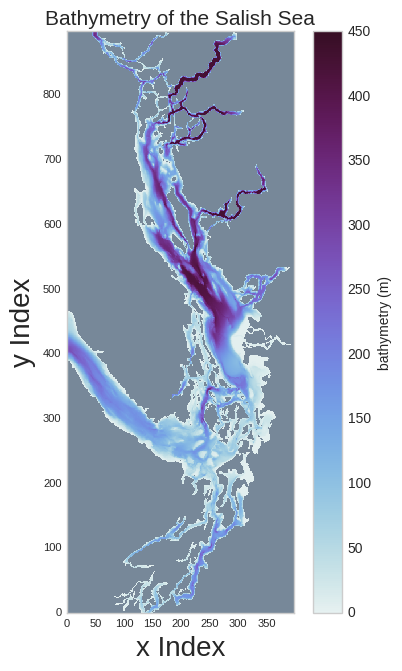

In [234]:
## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

def plot_bathy(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 15 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    cmap.set_bad('lightslategray')
    plt.suptitle(bigtit,fontsize=20)
    cbar = plt.colorbar(mesh)
    cbar.set_label(clabel)
fact = 0.25
plot_bathy(bath1,'Bathymetry of the Salish Sea', \
               cm.cm.dense,20*fact,30*fact,0,450,'bathymetry (m)','')

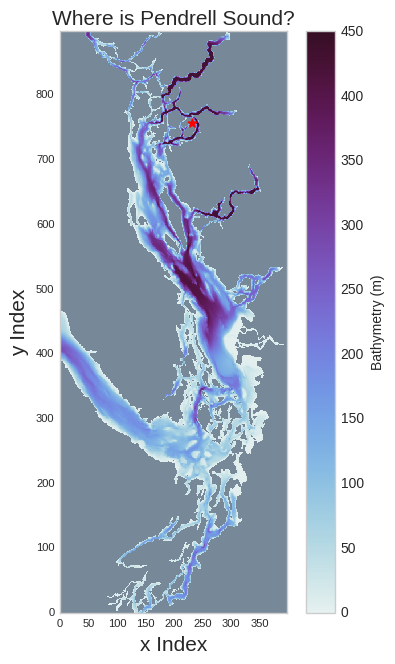

In [235]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
nav_lon = w['nav_lon'][:]
nav_lat = w['nav_lat'][:]
fact = 0.25
j, i = geo_tools.find_closest_model_point(-124.715, 50.270, nav_lon, nav_lat)


## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

fig, tax = plt.subplots(1, 1, figsize=(20*fact, 30*fact), sharey=True)
t_cmap = cm.cm.dense

#overview map
tplt = np.ma.masked_values(bath1,0)

tax.set_title('Where is Pendrell Sound?',fontsize = 15 )
viz_tools.set_aspect(tax)
mesh = tax.pcolormesh(tplt, cmap=t_cmap, vmin=0, vmax=450) 
tax.set_xlabel('x Index', fontsize = 15 )
tax.set_ylabel('y Index', fontsize = 15 )
tax.scatter(i,j, s = 40, marker = '*', color = 'red')
tax.set_xlim([0,398])
tax.set_ylim([0,898])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cbar = plt.colorbar(mesh)
cbar.set_label('Bathymetry (m)')
t_cmap.set_bad('lightslategray')


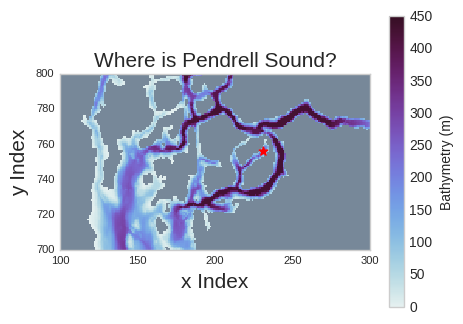

In [236]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
nav_lon = w['nav_lon'][:]
nav_lat = w['nav_lat'][:]
fact = 0.25
j, i = geo_tools.find_closest_model_point(-124.715, 50.270, nav_lon, nav_lat)


## map of bathymetry
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

fig, tax = plt.subplots(1, 1, figsize=(20*fact, 15*fact), sharey=True)
t_cmap = cm.cm.dense

#overview map
tplt = np.ma.masked_values(bath1,0)

tax.set_title('Where is Pendrell Sound?',fontsize = 15 )
viz_tools.set_aspect(tax)
mesh = tax.pcolormesh(tplt, cmap=t_cmap, vmin=0, vmax=450) 
tax.set_xlabel('x Index', fontsize = 15 )
tax.set_ylabel('y Index', fontsize = 15 )
tax.scatter(i,j, s = 40, marker = '*', color = 'red')
tax.set_xlim([100,300])
tax.set_ylim([700,800])
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cbar = plt.colorbar(mesh)
cbar.set_label('Bathymetry (m)')
t_cmap.set_bad('lightslategray')


### Where is Pendrell Sound?

I am defining Pendrell Sound as 50.270 N, 124.715 W here. 

This corresponds to model point i: 231 and j: 756


In [237]:
#pickling code
#oma_dir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_OMA/'

# BR_OmA = nc.Dataset(oma_dir + 'OMA_current_NCS/BR_OmA.nc')
# PI_OmA = nc.Dataset(oma_dir + 'OMA_current_NCS/PI_OmA.nc')

# BR_OmA_PS = BR_OmA['model_output']['OmA'][:,:,j,i]
# PI_OmA_PS = PI_OmA['model_output']['OmA'][:,:,j,i]

# pickle.dump(BR_OmA_PS, open("BR_OmA_PS.pkl", 'wb')) 
# pickle.dump(PI_OmA_PS, open("PI_OmA_PS.pkl", 'wb')) 

### Technical note on how .pkl / .nc was extracted:

The BR_OmA.nc and PI_OmA.nc daily resolution .nc is in:

    carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/KEY_OMA/OMA_current_NCS/'
    
    
I then just extracted everything for point i: 231, and j: 756 and pickled it for easy access, in BR_OmA_PS.pkl, which is in this folder directly.





### Very quick histograms of BR and PI values for this station

In [238]:
BR_OmA_PS = pickle.load(open('./BR_OmA_PS.pkl', 'rb'))
PI_OmA_PS = pickle.load(open('./PI_OmA_PS.pkl', 'rb'))


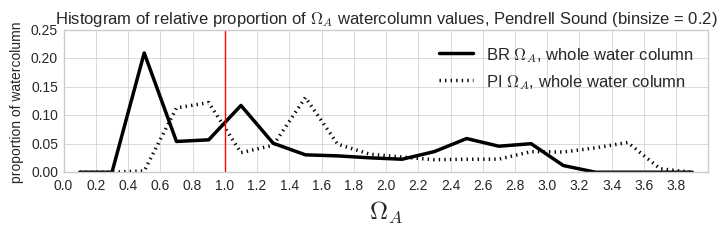

In [239]:
step = 0.2
t_start = 0
t_end = 4.0
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)

def manual_hist(test_hist):
    bin_prop = np.zeros_like(bin_centres)
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop
        
T_BR_OmA = \
BR_OmA_PS[BR_OmA_PS<1e10]
bin_prop_BR  = manual_hist(BR_OmA_PS)
t_BR_PS = np.copy(bin_prop_BR)

T_PI_OmA = \
PI_OmA_PS[PI_OmA_PS<1e10]
bin_prop_PI  = manual_hist(PI_OmA_PS)
t_PI_PS = np.copy(bin_prop_PI)



fact = 0.52
fig = plt.figure(figsize=(16*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
ax1.plot(bin_centres,t_BR_PS,\
        color = 'black',linewidth = lw, label = 'BR $\Omega_A$, whole water column')
ax1.plot(bin_centres,t_PI_PS,\
        color = 'black',linewidth = lw, linestyle = ':', \
        label = 'PI $\Omega_A$, whole water column')
ax1.legend(loc = 'upper right')
ax1.set_title('Histogram of relative proportion of $\Omega_A$ watercolumn values, Pendrell Sound (binsize = 0.2)')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('proportion of watercolumn')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, 4, step=0.2))

### Hovmöller diagram of daily-resolution aragonite state

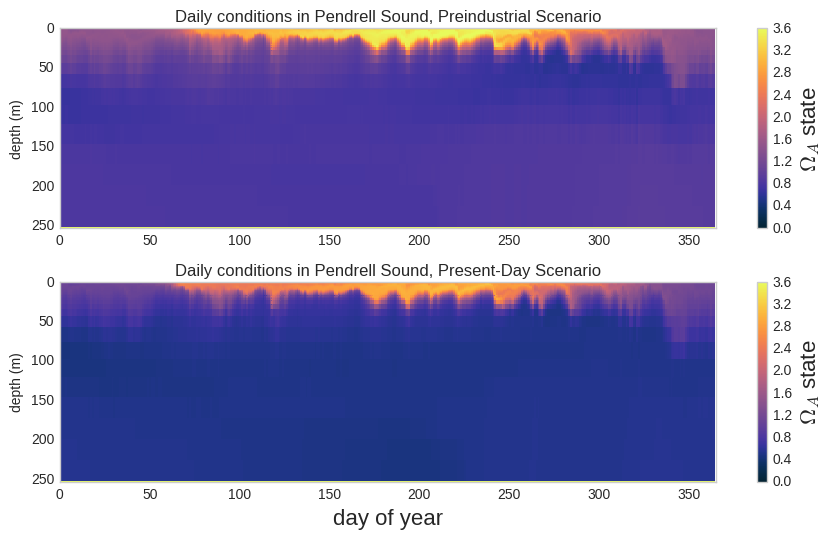

In [240]:


test_LO = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2018m01d01.nc')
zlevels = (test_LO['deptht'][:])

fig = plt.figure(figsize=(9,5.5))
nop = 2
tvmin = 0
tvmax = 3.6

for i in range(1,nop+1):
        
    if i == 1:
        ax = fig.add_subplot(2,1,i)
        section_slice = np.arange(0,365,1)

        sd = (np.transpose(PI_OmA_PS))
        tplt = np.ma.masked_values(sd,0)

        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = cm.cm.thermal, vmin=tvmin, vmax=tvmax)
        ax.set_ylim([0,253])
        ax.set_xlim([0,365])
        ax.invert_yaxis()
        cbar = fig.colorbar(mesh, ax=ax)
        plt.title('Daily conditions in Pendrell Sound, Preindustrial Scenario') 
        ax.set_ylabel('depth (m)')
        cbar.set_label('$\Omega_A$ state', fontsize = 16)



    if i == 2:
        ax = fig.add_subplot(2,1,i)
        section_slice = np.arange(0,365,1)

        sd = (np.transpose(BR_OmA_PS))
        tplt = np.ma.masked_values(sd,0)

        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt[:,:], cmap = cm.cm.thermal, vmin=tvmin, vmax=tvmax)
        ax.set_ylim([0,253])
        ax.set_xlim([0,365])
        ax.invert_yaxis()
        cbar = fig.colorbar(mesh, ax=ax)
        plt.title('Daily conditions in Pendrell Sound, Present-Day Scenario') 
        ax.set_ylabel('depth (m)')
        ax.set_xlabel('day of year', fontsize = 16)
        cbar.set_label('$\Omega_A$ state', fontsize = 16)

        
plt.tight_layout()

### Statistics on benthic $\Omega_A$

In [241]:
BR_benthic_OmA = (BR_OmA_PS[:,31])
PI_benthic_OmA = (PI_OmA_PS[:,31])

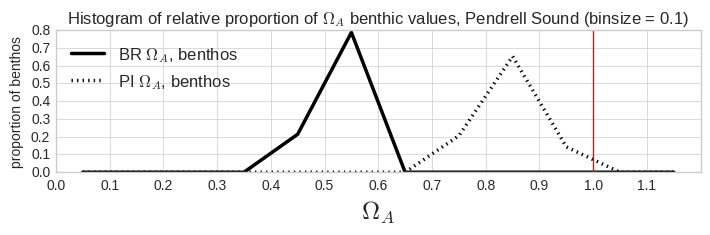

In [242]:
tstep = 0.1
t_start = 0
t_end = 1.2
bin_starts = np.arange(t_start,t_end,tstep)
bin_ends = np.arange(t_start+tstep,t_end+step,tstep)
bin_centres = np.arange(t_start+tstep/2,t_end + tstep/2 ,tstep)

        
T_BR_OmA = BR_benthic_OmA
bin_prop_BR  = manual_hist(BR_benthic_OmA)
t_BR_PS = np.copy(bin_prop_BR)

T_PI_OmA = PI_benthic_OmA
bin_prop_PI  = manual_hist(PI_benthic_OmA)
t_PI_PS = np.copy(bin_prop_PI)



fact = 0.52
fig = plt.figure(figsize=(16*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
ax1.plot(bin_centres,t_BR_PS,\
        color = 'black',linewidth = lw, label = 'BR $\Omega_A$, benthos')
ax1.plot(bin_centres,t_PI_PS,\
        color = 'black',linewidth = lw, linestyle = ':', \
        label = 'PI $\Omega_A$, benthos')
ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of $\Omega_A$ benthic values, Pendrell Sound (binsize = '+str(tstep)+')')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('proportion of benthos')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, t_end, step=tstep))

### Statistics on $\Omega_A$ at 10m and 20m

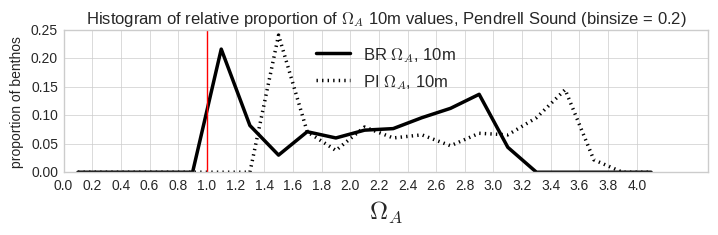

In [243]:
#18 is roughly 20
#9 is roughly 10
tdepth = 9 
BR_OmA_10 = (BR_OmA_PS[:,tdepth])
PI_OmA_10 = (PI_OmA_PS[:,tdepth])

T_PI_OmA = PI_OmA_10
T_BR_OmA = BR_OmA_10

tstep = 0.2
t_start = 0
t_end = 4.2
bin_starts = np.arange(t_start,t_end,tstep)
bin_ends = np.arange(t_start+tstep,t_end+step,tstep)
bin_centres = np.arange(t_start+tstep/2,t_end + tstep/2 ,tstep)

        

bin_prop_BR  = manual_hist(T_BR_OmA)
t_BR_PS = np.copy(bin_prop_BR)


bin_prop_PI  = manual_hist(T_PI_OmA)
t_PI_PS = np.copy(bin_prop_PI)



fact = 0.52
fig = plt.figure(figsize=(16*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
ax1.plot(bin_centres,t_BR_PS,\
        color = 'black',linewidth = lw, label = 'BR $\Omega_A$, 10m')
ax1.plot(bin_centres,t_PI_PS,\
        color = 'black',linewidth = lw, linestyle = ':', \
        label = 'PI $\Omega_A$, 10m')
ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of $\Omega_A$ 10m values, Pendrell Sound (binsize = '+str(tstep)+')')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('proportion of benthos')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, t_end, step=tstep))


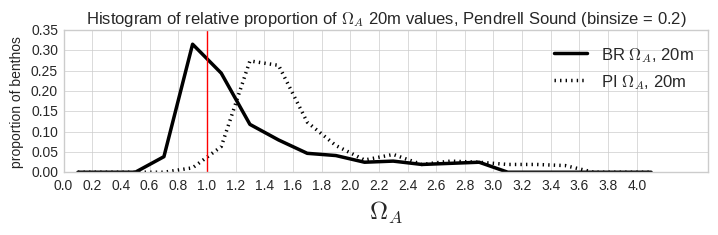

In [244]:
#18 is roughly 20
#9 is roughly 10
tdepth = 18 
BR_OmA_20 = (BR_OmA_PS[:,tdepth])
PI_OmA_20 = (PI_OmA_PS[:,tdepth])

T_PI_OmA = PI_OmA_20
T_BR_OmA = BR_OmA_20

tstep = 0.2
t_start = 0
t_end = 4.2
bin_starts = np.arange(t_start,t_end,tstep)
bin_ends = np.arange(t_start+tstep,t_end+step,tstep)
bin_centres = np.arange(t_start+tstep/2,t_end + tstep/2 ,tstep)

        

bin_prop_BR  = manual_hist(T_BR_OmA)
t_BR_PS = np.copy(bin_prop_BR)


bin_prop_PI  = manual_hist(T_PI_OmA)
t_PI_PS = np.copy(bin_prop_PI)



fact = 0.52
fig = plt.figure(figsize=(16*fact,12*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)
ax1.plot(bin_centres,t_BR_PS,\
        color = 'black',linewidth = lw, label = 'BR $\Omega_A$, 20m')
ax1.plot(bin_centres,t_PI_PS,\
        color = 'black',linewidth = lw, linestyle = ':', \
        label = 'PI $\Omega_A$, 20m')
ax1.legend(loc = 'best')
ax1.set_title('Histogram of relative proportion of $\Omega_A$ 20m values, Pendrell Sound (binsize = '+str(tstep)+')')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('proportion of benthos')
plt.axvline(x=1, color = 'red')
w = ax1.set_xticks(np.arange(0, t_end, step=tstep))


### Watercolumn

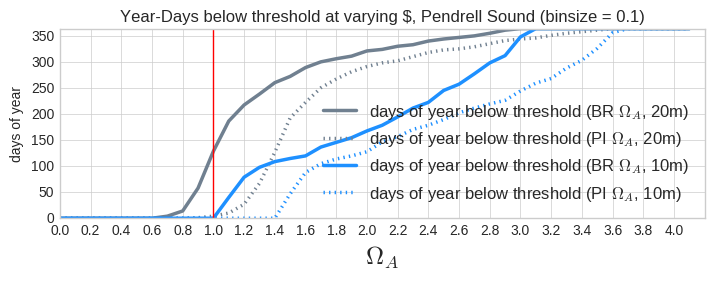

In [245]:
tstep = 0.1
tend = 4.2
Oma_thres = np.arange(0,tend,tstep)
PI_10m_below_thres = np.zeros_like(Oma_thres)
PI_20m_below_thres = np.zeros_like(Oma_thres)
BR_10m_below_thres = np.zeros_like(Oma_thres)
BR_20m_below_thres = np.zeros_like(Oma_thres)

for i in range(0,len(Oma_thres)):
    t_thres = Oma_thres[i]

    PI_20m_below_thres[i] = np.size(PI_OmA_20[PI_OmA_20<t_thres])
    PI_10m_below_thres[i] = np.size(PI_OmA_10[PI_OmA_10<t_thres])
    BR_20m_below_thres[i] = np.size(BR_OmA_20[BR_OmA_20<t_thres])
    BR_10m_below_thres[i] = np.size(BR_OmA_10[BR_OmA_10<t_thres])
    

fig = plt.figure(figsize=(16*fact,16*fact))
lw = 2.5
ax1 = fig.add_subplot(3,1,1)

#20m
ax1.plot(Oma_thres,BR_20m_below_thres,\
        color = 'slategrey',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 20m)')
ax1.plot(Oma_thres,PI_20m_below_thres,\
        color = 'slategrey',linewidth = lw, linestyle = ':', \
         label = 'days of year below threshold (PI $\Omega_A$, 20m)')

#10m
ax1.plot(Oma_thres,BR_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 10m)')
ax1.plot(Oma_thres,PI_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, linestyle = ':', \
         label = 'days of year below threshold (PI $\Omega_A$, 10m)')

ax1.legend(loc = 'best')
ax1.set_title('Year-Days below threshold at varying $, Pendrell Sound (binsize = '+str(tstep)+')')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('days of year')
plt.axvline(x=1, color = 'red')
ax1.set_xlim([0,tend])
ax1.set_ylim([0,365])
w = ax1.set_xticks(np.arange(0, tend, step=tstep*2))

    

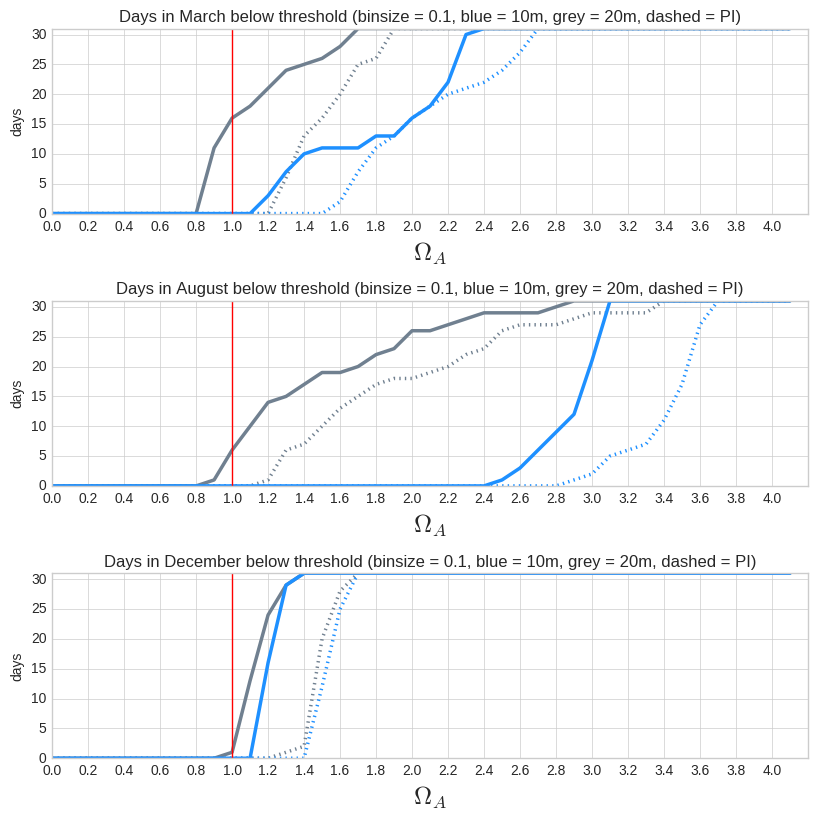

In [246]:
tstep = 0.1
tend = 4.2
Oma_thres = np.arange(0,tend,tstep)
PI_10m_below_thres = np.zeros_like(Oma_thres)
PI_20m_below_thres = np.zeros_like(Oma_thres)
BR_10m_below_thres = np.zeros_like(Oma_thres)
BR_20m_below_thres = np.zeros_like(Oma_thres)

    
fig = plt.figure(figsize=(16*fact,16*fact))
lw = 2.5

ax1 = fig.add_subplot(3,1,1)
#march
mon = 'March'
sday = 59
eday = sday + 31

for i in range(0,len(Oma_thres)):
    t_thres = Oma_thres[i]
    t_PI_OmA_20 = PI_OmA_20[sday:eday]
    t_BR_OmA_20 = BR_OmA_20[sday:eday]
    t_PI_OmA_10 = PI_OmA_10[sday:eday]
    t_BR_OmA_10 = BR_OmA_10[sday:eday]
    
    PI_20m_below_thres[i] = np.size(t_PI_OmA_20[t_PI_OmA_20<t_thres])
    PI_10m_below_thres[i] = np.size(t_PI_OmA_10[t_PI_OmA_10<t_thres])
    BR_20m_below_thres[i] = np.size(t_BR_OmA_20[t_BR_OmA_20<t_thres])
    BR_10m_below_thres[i] = np.size(t_BR_OmA_10[t_BR_OmA_10<t_thres])

#20m
ax1.plot(Oma_thres,BR_20m_below_thres,\
        color = 'slategrey',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 20m)')
ax1.plot(Oma_thres,PI_20m_below_thres,\
        color = 'slategrey',linewidth = lw, linestyle = ':', \
         label = 'days in' + mon + 'below threshold (PI $\Omega_A$, 20m)')
#10m
ax1.plot(Oma_thres,BR_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 10m)')
ax1.plot(Oma_thres,PI_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, linestyle = ':', \
         label = 'days in' + mon + 'below threshold (PI $\Omega_A$, 10m)')

ax1.set_title('Days in ' + mon + ' below threshold (binsize = '+str(tstep)+', blue = 10m, grey = 20m, dashed = PI)')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('days')
plt.axvline(x=1, color = 'red')
ax1.set_xlim([0,tend])
ax1.set_ylim([0,31])
w = ax1.set_xticks(np.arange(0, tend, step=tstep*2))
#ax1.legend(loc = 'best')


ax1 = fig.add_subplot(3,1,2)
#march
mon = 'August'
sday = 212
eday = sday + 31

for i in range(0,len(Oma_thres)):
    t_thres = Oma_thres[i]
    t_PI_OmA_20 = PI_OmA_20[sday:eday]
    t_BR_OmA_20 = BR_OmA_20[sday:eday]
    t_PI_OmA_10 = PI_OmA_10[sday:eday]
    t_BR_OmA_10 = BR_OmA_10[sday:eday]
    
    PI_20m_below_thres[i] = np.size(t_PI_OmA_20[t_PI_OmA_20<t_thres])
    PI_10m_below_thres[i] = np.size(t_PI_OmA_10[t_PI_OmA_10<t_thres])
    BR_20m_below_thres[i] = np.size(t_BR_OmA_20[t_BR_OmA_20<t_thres])
    BR_10m_below_thres[i] = np.size(t_BR_OmA_10[t_BR_OmA_10<t_thres])

#20m
ax1.plot(Oma_thres,BR_20m_below_thres,\
        color = 'slategrey',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 20m)')
ax1.plot(Oma_thres,PI_20m_below_thres,\
        color = 'slategrey',linewidth = lw, linestyle = ':', \
         label = 'days in' + mon + 'below threshold (PI $\Omega_A$, 20m)')
#10m
ax1.plot(Oma_thres,BR_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 10m)')
ax1.plot(Oma_thres,PI_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, linestyle = ':', \
         label = 'days in' + mon + 'below threshold (PI $\Omega_A$, 10m)')

ax1.set_title('Days in ' + mon + ' below threshold (binsize = '+str(tstep)+', blue = 10m, grey = 20m, dashed = PI)')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('days')
plt.axvline(x=1, color = 'red')
ax1.set_xlim([0,tend])
ax1.set_ylim([0,31])
w = ax1.set_xticks(np.arange(0, tend, step=tstep*2))
#ax1.legend(loc = 'best')

ax1 = fig.add_subplot(3,1,3)
#march
mon = 'December'
sday = 334
eday = sday + 31

for i in range(0,len(Oma_thres)):
    t_thres = Oma_thres[i]
    t_PI_OmA_20 = PI_OmA_20[sday:eday]
    t_BR_OmA_20 = BR_OmA_20[sday:eday]
    t_PI_OmA_10 = PI_OmA_10[sday:eday]
    t_BR_OmA_10 = BR_OmA_10[sday:eday]
    
    PI_20m_below_thres[i] = np.size(t_PI_OmA_20[t_PI_OmA_20<t_thres])
    PI_10m_below_thres[i] = np.size(t_PI_OmA_10[t_PI_OmA_10<t_thres])
    BR_20m_below_thres[i] = np.size(t_BR_OmA_20[t_BR_OmA_20<t_thres])
    BR_10m_below_thres[i] = np.size(t_BR_OmA_10[t_BR_OmA_10<t_thres])

#20m
ax1.plot(Oma_thres,BR_20m_below_thres,\
        color = 'slategrey',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 20m)')
ax1.plot(Oma_thres,PI_20m_below_thres,\
        color = 'slategrey',linewidth = lw, linestyle = ':', \
         label = 'days in' + mon + 'below threshold (PI $\Omega_A$, 20m)')
#10m
ax1.plot(Oma_thres,BR_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, label = 'days of year below threshold (BR $\Omega_A$, 10m)')
ax1.plot(Oma_thres,PI_10m_below_thres,\
        color = 'dodgerblue',linewidth = lw, linestyle = ':', \
         label = 'days in' + mon + 'below threshold (PI $\Omega_A$, 10m)')

ax1.set_title('Days in ' + mon + ' below threshold (binsize = '+str(tstep)+', blue = 10m, grey = 20m, dashed = PI)')
ax1.set_xlabel('$\Omega_A$', fontsize = 18)
ax1.set_ylabel('days')
plt.axvline(x=1, color = 'red')
ax1.set_xlim([0,tend])
ax1.set_ylim([0,31])
w = ax1.set_xticks(np.arange(0, tend, step=tstep*2))
#ax1.legend(loc = 'best')

plt.tight_layout()

### Aragonite saturation horizon shoaling

In [247]:
def find_depth_deepalg(dp,prof,water_depth):
    #finds saturation horizon given a profile and corresponding depths
    first_proper_undersat = np.nan
    depth_undersat = np.nan    
    dummy_var = 0
    #print(prof)
    #print('')
    if np.ma.min(prof) >=1e19:
        dummy_var = 0
        depth_undersat = np.nan
        #print('masks all around!')
    elif np.ma.min(prof) >=1:
        depth_undersat = water_depth
        #print('saturated column')
    elif np.ma.max(prof) <1:
        depth_undersat = 0
        #print('undersat to surface')        
    else:
        t_ind = np.where(prof<1)
        t_indar = t_ind[0][0]
        t_indss = np.where(prof>=1)
        t_indsssar = t_indss[0][0]
        if t_indar.size == 0:
            dummy_var = 0
        else:
            if (t_indar.size != 0) & (t_indsssar.size == 0):
                depth_undersat = 0
                first_proper_undersat = 0
                dummy_var = 0
                #print('undersat to surface!')
                max_supsat = np.nan
            else:    
                max_supsat = np.max(t_indsssar)    
                try:
                    first_proper_undersat = np.min(t_indar[t_indar>max_supsat])
                except:
                    dummy_var = 0
                    #print("An exception occurred")
                if first_proper_undersat == 0:
                    depth_undersat = dp[0]
                elif np.isnan(first_proper_undersat):
                    dummy_var = 0
                    #print('saturated watercolumn!')
                else:
                    depth_undersat = (dp[first_proper_undersat]+dp[first_proper_undersat-1])/2
    return depth_undersat


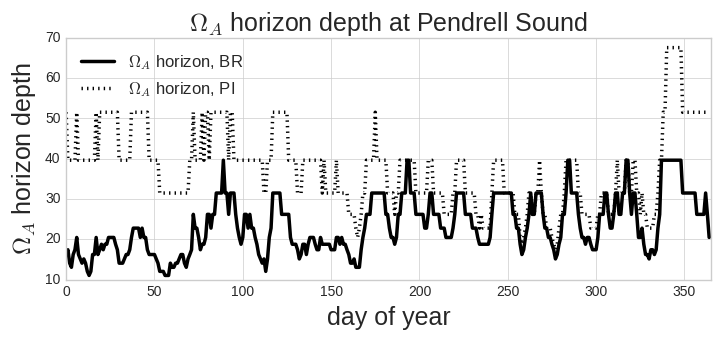

In [248]:
water_depth = bath.variables['Bathymetry'][j,i]
BR_OmA_HORIZON = np.zeros(365)
PI_OmA_HORIZON = np.zeros(365)

for i in range(0,365):
    test = BR_OmA_PS[i,:]
    BR_OmA_HORIZON[i] = find_depth_deepalg(zlevels,test,water_depth)
    test = PI_OmA_PS[i,:]
    PI_OmA_HORIZON[i] = find_depth_deepalg(zlevels,test,water_depth)



fig = plt.figure(figsize=(16*fact,6*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)


ax1.plot(np.arange(0,365,1),BR_OmA_HORIZON,\
        color = 'black',linewidth = lw, label = '$\Omega_A$ horizon, BR')
ax1.plot(np.arange(0,365,1),PI_OmA_HORIZON,\
        color = 'black',linewidth = lw, linestyle = ':', label = '$\Omega_A$ horizon, PI')


ax1.legend(loc = 'best')
ax1.set_title('$\Omega_A$ horizon depth at Pendrell Sound', fontsize = 18)
ax1.set_xlabel('day of year', fontsize = 18)
ax1.set_ylabel('$\Omega_A$ horizon depth', fontsize = 18)
w = ax1.set_xlim([0,365])


    


In [249]:
print('done')

done
